In [105]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
os.chdir(r'C:\Users\63094\Downloads\hero wired\datacsv')
os.listdir()
df=pd.read_csv('Dataset (4).csv')
df

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9573,0,all_other,0.1461,344.76,12.180755,10.39,672,10474.000000,215372,82.1,2,0,0,1
9574,0,all_other,0.1253,257.70,11.141862,0.21,722,4380.000000,184,1.1,5,0,0,1
9575,0,debt_consolidation,0.1071,97.81,10.596635,13.09,687,3450.041667,10036,82.9,8,0,0,1
9576,0,home_improvement,0.1600,351.58,10.819778,19.18,692,1800.000000,0,3.2,5,0,0,1


### preparing data for modelling

In [106]:
df1=df.rename(columns={'int.rate':'interestrate','installment':'montly installment','log.annual.inc':'annual income(log)','dti':'debts/income','fico':'creditscore','days.with.cr.line':'credit_line_ days','revol.bal':'balanceto be_paid','delinq.2yrs':'overdue_months','pub.rec':'public_record', 'not.fully.paid':'target','inq.last.6mths':'enquiry','revol.util':'credit_line_utilisation'})


In [107]:
df1

,credit.policy,purpose,interestrate,montly installment,annual income(log),debts/income,creditscore,credit_line_ days,balanceto be_paid,credit_line_utilisation,enquiry,overdue_months,public_record,target
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9573,0,all_other,0.1461,344.76,12.180755,10.39,672,10474.000000,215372,82.1,2,0,0,1
9574,0,all_other,0.1253,257.70,11.141862,0.21,722,4380.000000,184,1.1,5,0,0,1
9575,0,debt_consolidation,0.1071,97.81,10.596635,13.09,687,3450.041667,10036,82.9,8,0,0,1
9576,0,home_improvement,0.1600,351.58,10.819778,19.18,692,1800.000000,0,3.2,5,0,0,1


In [108]:
df1['creditline_years']=df1['credit_line_ days']/365
###converting days into years
df1.drop(labels=['credit_line_ days'],axis=1,inplace=True)
##dropping the days.with.cr.line

In [109]:
df1

,credit.policy,purpose,interestrate,montly installment,annual income(log),debts/income,creditscore,balanceto be_paid,credit_line_utilisation,enquiry,overdue_months,public_record,target,creditline_years
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,28854,52.1,0,0,0,0,15.451941
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,33623,76.7,0,0,0,0,7.561644
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,3511,25.6,1,0,0,0,12.904110
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,33667,73.2,1,0,0,0,7.397146
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4740,39.5,0,1,0,0,11.139726
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9573,0,all_other,0.1461,344.76,12.180755,10.39,672,215372,82.1,2,0,0,1,28.695890
9574,0,all_other,0.1253,257.70,11.141862,0.21,722,184,1.1,5,0,0,1,12.000000
9575,0,debt_consolidation,0.1071,97.81,10.596635,13.09,687,10036,82.9,8,0,0,1,9.452169
9576,0,home_improvement,0.1600,351.58,10.819778,19.18,692,0,3.2,5,0,0,1,4.931507


<AxesSubplot:xlabel='creditline_years', ylabel='Count'>

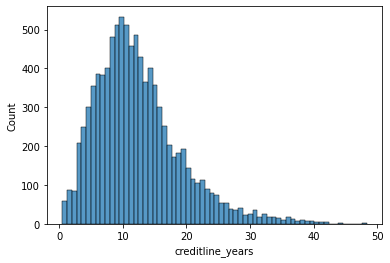

In [56]:
sns.histplot(df1['creditline_years'])

### correlation

<Figure size 936x1728 with 0 Axes>

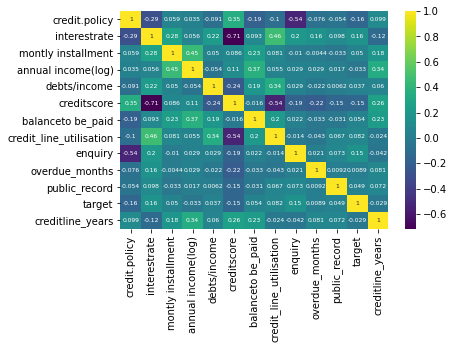

<Figure size 936x1728 with 0 Axes>

In [110]:
sns.heatmap(df1.corr(),cmap='viridis',annot=True,annot_kws={"size":6})
plt.figure(figsize=(13,24))

In [57]:
df1.corr()

,credit.policy,interestrate,montly installment,annual income(log),debts/income,creditscore,balanceto be_paid,credit_line_utilisation,enquiry,overdue_months,public_record,target,creditline_years
credit.policy,1.000000,-0.294089,0.058770,0.034906,-0.090901,0.348319,-0.187518,-0.104095,-0.535511,-0.076318,-0.054243,-0.158119,0.099026
interestrate,-0.294089,1.000000,0.276140,0.056383,0.220006,-0.714821,0.092527,0.464837,0.202780,0.156079,0.098162,0.159552,-0.124022
montly installment,0.058770,0.276140,1.000000,0.448102,0.050202,0.086039,0.233625,0.081356,-0.010419,-0.004368,-0.032760,0.049955,0.183297
annual income(log),0.034906,0.056383,0.448102,1.000000,-0.054065,0.114576,0.372140,0.054881,0.029171,0.029203,0.016506,-0.033439,0.336896
debts/income,-0.090901,0.220006,0.050202,-0.054065,1.000000,-0.241191,0.188748,0.337109,0.029189,-0.021792,0.006209,0.037362,0.060101
creditscore,0.348319,-0.714821,0.086039,0.114576,-0.241191,1.000000,-0.015553,-0.541289,-0.185293,-0.216340,-0.147592,-0.149666,0.263880
balanceto be_paid,-0.187518,0.092527,0.233625,0.372140,0.188748,-0.015553,1.000000,0.203779,0.022394,-0.033243,-0.031010,0.053699,0.229344
credit_line_utilisation,-0.104095,0.464837,0.081356,0.054881,0.337109,-0.541289,0.203779,1.000000,-0.013880,-0.042740,0.066717,0.082088,-0.024239
enquiry,-0.535511,0.202780,-0.010419,0.029171,0.029189,-0.185293,0.022394,-0.013880,1.000000,0.021245,0.072673,0.149452,-0.041736
overdue_months,-0.076318,0.156079,-0.004368,0.029203,-0.021792,-0.216340,-0.033243,-0.042740,0.021245,1.000000,0.009184,0.008881,0.081374


In [59]:
### we see that interest rate and creditscore negatively correlated
###we seethat credit score and interest rate are negatively correlated

### ENCODING

In [111]:
x=df1.drop('target',axis=1)
y=df1['target']

In [113]:
x_encoded=pd.get_dummies(x,columns=['purpose'],drop_first=True)
x_encoded

,credit.policy,interestrate,montly installment,annual income(log),debts/income,creditscore,balanceto be_paid,credit_line_utilisation,enquiry,overdue_months,public_record,creditline_years,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,28854,52.1,0,0,0,15.451941,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,33623,76.7,0,0,0,7.561644,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,3511,25.6,1,0,0,12.904110,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,33667,73.2,1,0,0,7.397146,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4740,39.5,0,1,0,11.139726,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9573,0,0.1461,344.76,12.180755,10.39,672,215372,82.1,2,0,0,28.695890,0,0,0,0,0,0
9574,0,0.1253,257.70,11.141862,0.21,722,184,1.1,5,0,0,12.000000,0,0,0,0,0,0
9575,0,0.1071,97.81,10.596635,13.09,687,10036,82.9,8,0,0,9.452169,0,1,0,0,0,0
9576,0,0.1600,351.58,10.819778,19.18,692,0,3.2,5,0,0,4.931507,0,0,0,1,0,0


### MODELING

In [114]:
x_train,x_test,y_train,y_test=train_test_split(x_encoded,y,test_size=0.25)

<IPython.core.display.Javascript object>

In [115]:
from sklearn import tree
model=tree.DecisionTreeClassifier( criterion='gini',random_state=42)

In [116]:
model.fit(x_train,y_train)

DecisionTreeClassifier(random_state=42)

In [117]:
model.score(x_test,y_test)

0.7482254697286013

In [118]:
model.score(x_train,y_train)

1.0

In [119]:
y_pred_train=model.predict(x_train)
y_pred_test=model.predict(x_test)

In [120]:
from sklearn.metrics import classification_report,confusion_matrix,roc_auc_score,accuracy_score,precision_score,recall_score,f1_score
cm_train=confusion_matrix(y_train,y_pred_train)
cm_train

array([[6024,    0],
       [   0, 1159]], dtype=int64)

<AxesSubplot:>

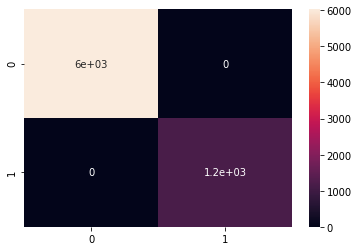

In [121]:
sns.heatmap(cm_train,annot=True)

In [122]:
b=classification_report(y_train,y_pred_train)
print(b)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6024
           1       1.00      1.00      1.00      1159

    accuracy                           1.00      7183
   macro avg       1.00      1.00      1.00      7183
weighted avg       1.00      1.00      1.00      7183



### testing

In [123]:
cm_test=confusion_matrix(y_test,y_pred_test)
cm_test

array([[1692,  329],
       [ 274,  100]], dtype=int64)

In [124]:
b=classification_report(y_test,y_pred_test)
print(b)

              precision    recall  f1-score   support

           0       0.86      0.84      0.85      2021
           1       0.23      0.27      0.25       374

    accuracy                           0.75      2395
   macro avg       0.55      0.55      0.55      2395
weighted avg       0.76      0.75      0.76      2395



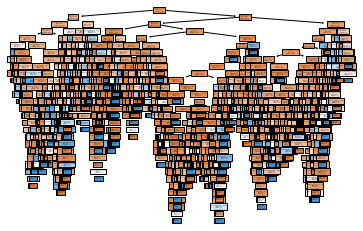

In [127]:
tree.plot_tree(model,filled=True,feature_names=df1_encoded.columns);

### removing negatively correlated variables

In [132]:
x_c=df1.drop(labels=['target','creditscore'],axis=1)
y_c=df1['target']

In [133]:
x_encoded_c=pd.get_dummies(x_c,columns=['purpose'],drop_first=True)
x_encoded_c

,credit.policy,interestrate,montly installment,annual income(log),debts/income,balanceto be_paid,credit_line_utilisation,enquiry,overdue_months,public_record,creditline_years,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,28854,52.1,0,0,0,15.451941,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,33623,76.7,0,0,0,7.561644,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,3511,25.6,1,0,0,12.904110,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,33667,73.2,1,0,0,7.397146,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,4740,39.5,0,1,0,11.139726,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9573,0,0.1461,344.76,12.180755,10.39,215372,82.1,2,0,0,28.695890,0,0,0,0,0,0
9574,0,0.1253,257.70,11.141862,0.21,184,1.1,5,0,0,12.000000,0,0,0,0,0,0
9575,0,0.1071,97.81,10.596635,13.09,10036,82.9,8,0,0,9.452169,0,1,0,0,0,0
9576,0,0.1600,351.58,10.819778,19.18,0,3.2,5,0,0,4.931507,0,0,0,1,0,0


In [139]:
x_train,x_test,y_train,y_test=train_test_split(x_encoded_c,y,test_size=0.25)

<IPython.core.display.Javascript object>

In [135]:
from sklearn import tree
model=tree.DecisionTreeClassifier( criterion='gini',random_state=42)

In [140]:
model.fit(x_train,y_train)

DecisionTreeClassifier(random_state=42)

In [144]:
model.score(x_test,y_test)

0.7461377870563675

In [145]:
model.score(x_train,y_train)

1.0

In [146]:
y_pred_train=model.predict(x_train)
y_pred_test=model.predict(x_test)

### train

In [147]:
from sklearn.metrics import classification_report,confusion_matrix,roc_auc_score,accuracy_score,precision_score,recall_score,f1_score
cm_train=confusion_matrix(y_train,y_pred_train)
cm_train

array([[6026,    0],
       [   0, 1157]], dtype=int64)

In [148]:
b=classification_report(y_train,y_pred_train)
print(b)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6026
           1       1.00      1.00      1.00      1157

    accuracy                           1.00      7183
   macro avg       1.00      1.00      1.00      7183
weighted avg       1.00      1.00      1.00      7183



### test

In [149]:
cm_test=confusion_matrix(y_test,y_pred_test)
cm_test

array([[1702,  317],
       [ 291,   85]], dtype=int64)

In [150]:
b=classification_report(y_test,y_pred_test)
print(b)

              precision    recall  f1-score   support

           0       0.85      0.84      0.85      2019
           1       0.21      0.23      0.22       376

    accuracy                           0.75      2395
   macro avg       0.53      0.53      0.53      2395
weighted avg       0.75      0.75      0.75      2395

